# Mail Customer Data Market Segmentation

### Introduction

This project utilises an unlabelled dataset of mall customers.  This dataset contains basic data about customers such as  Customer ID, age, gender, annual income and spending score. The ‘spending score’ is assigned to the customer based on defined parameters such as past purchasing data.



The aim is to better understand the customers  preferences so we can easily target customers.

During this project we will use the K-means clustering unsupervised algorithm to segment the market into groups.  Then we will use principal component analysis (PCA) to visualise our clusters.


Aim:
    - To cluster the market data into various segments.
    - To visualise the data using principle component analysis (PCA)

# Customer Segmentation and Analysis 
### Steps to solve the problem :
1. Importing Libraries.
2. Exploration of data.
3. Data Visualization.
4. Clustering using K-Means.
5. Selection of Clusters.


Import the data and check the data types.
Drop the 'CustomerId' as won't be used.
Convert the remaining columns to floats if necessary.


## Importing Libraries.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

# We will need a label encoder to convert the gender data into numerical values.

## Data Exploration

In [2]:
data = pd.read_csv('desktop/data/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

# 200 rows  x 5 columns

# Preprocessing

In [4]:
data.drop('CustomerID', axis=1, inplace=True)

In [5]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Now to convert the male and female values into 0 and 1
(male 1 female 0) using LabelEncoder

In [6]:
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])

gender_mappings = {index: label for index, label in enumerate(encoder.classes_)}
gender_mappings

{0: 'Female', 1: 'Male'}

# Perform Feature Scaling


In [7]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [8]:
scaled_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


This will make it alot easier to cluster the data.

# Clustering

We want to know how many clusters to use. Kmeans will provide a model to fit our data to and we are going to specify the number of clusters in each one. 

In [9]:
max_clusters = 50

In [10]:
kmeans_tests = [KMeans(n_clusters=i, n_init=10) for i in range(1, max_clusters)]
inertias = [kmeans_tests[i].fit(scaled_data).inertia_ for i in range(len(kmeans_tests))]

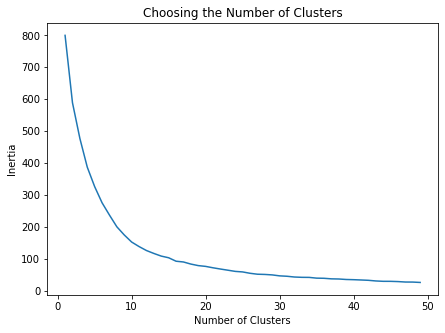

In [11]:
plt.figure(figsize=(7, 5))
plt.plot(range(1, max_clusters), inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Choosing the Number of Clusters')
plt.show()

# happy medium around 10

In [12]:
kmeans = KMeans(n_clusters=10, n_init=10)
kmeans.fit(scaled_data)

KMeans(n_clusters=10)

In [13]:
clusters = kmeans.predict(scaled_data)
clusters

array([6, 6, 9, 2, 9, 2, 9, 2, 5, 2, 5, 2, 9, 2, 9, 6, 9, 6, 5, 2, 6, 6,
       9, 6, 9, 6, 9, 6, 9, 2, 5, 2, 5, 6, 9, 2, 9, 2, 9, 2, 1, 6, 5, 2,
       9, 2, 1, 4, 4, 4, 1, 6, 4, 5, 1, 5, 1, 5, 4, 5, 5, 6, 1, 1, 5, 6,
       1, 1, 6, 4, 5, 1, 1, 1, 5, 6, 1, 6, 4, 1, 5, 6, 5, 1, 4, 5, 1, 4,
       4, 1, 1, 6, 5, 4, 4, 6, 1, 4, 5, 6, 4, 1, 5, 6, 5, 4, 1, 5, 5, 5,
       5, 4, 4, 6, 4, 4, 1, 1, 1, 1, 6, 4, 4, 0, 4, 7, 3, 0, 5, 0, 3, 0,
       4, 7, 3, 7, 8, 0, 3, 7, 8, 0, 4, 7, 3, 0, 3, 7, 8, 0, 3, 0, 8, 7,
       8, 7, 3, 7, 3, 7, 1, 7, 3, 7, 3, 7, 3, 7, 8, 0, 3, 0, 3, 0, 8, 7,
       3, 0, 3, 0, 8, 7, 3, 7, 8, 0, 8, 0, 8, 7, 8, 7, 3, 7, 8, 7, 8, 0,
       3, 0], dtype=int32)

##  PCA

This will help us understand the data in a better fashion.

In [14]:
pca = PCA(n_components=2)

reduced_data = pd.DataFrame(pca.fit_transform(scaled_data), columns=['PC1', 'PC2'])

In [15]:
reduced_data

,PC1,PC2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483
...,...,...
195,-1.179572,1.324568
196,0.672751,1.221061
197,-0.723719,2.765010
198,0.767096,2.861930


We now have the same 200 examples as before except their feature data has been compressed down into two different features.

### Cluster Centers

In [16]:
kmeans.cluster_centers_ #4dimensional space

array([[ 1.12815215, -0.39989994,  1.01344075,  1.26040667],
       [-0.88640526,  1.09830638, -0.24158313, -0.04807901],
       [-0.88640526, -0.93245435, -1.29459798,  1.12360689],
       [ 1.12815215, -0.02700694,  0.96701244, -1.39716754],
       [-0.88640526, -0.7906297 , -0.09294256, -0.14202221],
       [ 1.12815215,  1.43505777, -0.45298304, -0.40195247],
       [ 1.12815215, -0.97602698, -0.73705168,  0.41603773],
       [-0.88640526, -0.47793198,  0.97284787,  1.22158511],
       [-0.88640526,  0.35421988,  1.24912183, -1.14745442],
       [-0.7425083 ,  0.16967696, -1.31640908, -1.1668652 ]])

In [17]:
reduced_centers = pca.transform(kmeans.cluster_centers_)

/Users/syreetacharles-cole/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [18]:
reduced_centers

array([[-0.88272588,  1.65431318],
       [ 0.58233488, -0.85939176],
       [-1.61307574, -1.33371367],
       [ 1.19961046,  1.30582744],
       [-0.65343732, -0.55947734],
       [ 1.5303687 ,  0.17028966],
       [-0.68838314,  0.28733559],
       [-1.38150389,  0.3644368 ],
       [ 0.81659377,  0.24505923],
       [ 0.75229959, -1.61087948]])

In [19]:
reduced_data['cluster'] = clusters


In [20]:
reduced_data

,PC1,PC2,cluster
0,-0.406383,-0.520714,6
1,-1.427673,-0.367310,6
2,0.050761,-1.894068,9
3,-1.694513,-1.631908,2
4,-0.313108,-1.810483,9
...,...,...,...
195,-1.179572,1.324568,7
196,0.672751,1.221061,8
197,-0.723719,2.765010,0
198,0.767096,2.861930,3


In [21]:
reduced_data['cluster']== 6

0       True
1       True
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: cluster, Length: 200, dtype: bool

In [22]:
reduced_data[reduced_data['cluster']== 7].loc[:, 'PC1']

125   -1.312103
133   -1.152563
135   -1.704876
139   -0.982222
143   -1.530800
147   -1.184358
153   -0.941714
155   -1.831441
157   -1.389996
159   -1.256659
161   -1.572933
163   -1.741333
165   -1.015409
167   -1.697092
175   -1.605656
181   -1.509008
183   -1.710680
189   -1.286261
191   -1.057057
193   -1.349849
195   -1.179572
Name: PC1, dtype: float64

In [23]:
reduced_data[reduced_data['cluster']== 7].loc[:, 'PC2']

125   -0.114141
133   -0.079764
135    0.032444
139   -0.047104
143    0.093741
147    0.070861
153    0.063435
155    0.197380
157    0.130981
159    0.110947
161    0.187665
163    0.271269
165    0.278776
167    0.410446
175    0.455128
181    0.703128
183    0.762675
189    0.844610
191    0.810267
193    1.145861
195    1.324568
Name: PC2, dtype: float64

### Data Visualisation

We will be plotting a scatter plot of all of our examples and colour each cluster differently.

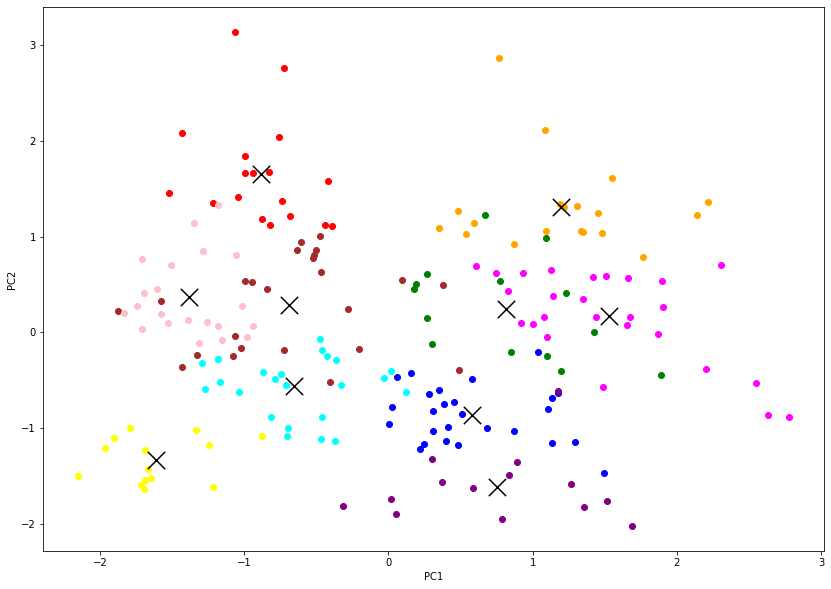

In [24]:
plt.figure(figsize = (14 , 10))

plt.scatter(reduced_data[reduced_data['cluster'] ==0].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] ==0].loc[:, 'PC2'], color='red') 
plt.scatter(reduced_data[reduced_data['cluster'] ==1].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] ==1].loc[:, 'PC2'], color='blue') 
plt.scatter(reduced_data[reduced_data['cluster'] ==2].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] ==2].loc[:, 'PC2'], color='yellow') 
plt.scatter(reduced_data[reduced_data['cluster'] ==3].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] ==3].loc[:, 'PC2'], color='orange') 
plt.scatter(reduced_data[reduced_data['cluster'] ==4].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] ==4].loc[:, 'PC2'], color='cyan') 
plt.scatter(reduced_data[reduced_data['cluster'] ==5].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] ==5].loc[:, 'PC2'], color='magenta') 
plt.scatter(reduced_data[reduced_data['cluster'] ==6].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] ==6].loc[:, 'PC2'], color='brown') 
plt.scatter(reduced_data[reduced_data['cluster'] ==7].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] ==7].loc[:, 'PC2'], color='pink') 
plt.scatter(reduced_data[reduced_data['cluster'] ==8].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] ==8].loc[:, 'PC2'], color='green') 
plt.scatter(reduced_data[reduced_data['cluster'] ==9].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] ==9].loc[:, 'PC2'], color='purple') 

plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], color='black', marker='x', s=300)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

In [ ]:
Each of the 10 clusters has been assigned a different colour. 
Each cluster now has a black X marking its centroid. We can see that the market has now has now been segmented into 
10 ten different clusters.

